In [19]:
#!g1.1
import json

from keras.callbacks import ModelCheckpoint
from keras.layers import (
    Dense, Input, Flatten, Dropout,
    Conv1D, MaxPooling1D, Embedding
)
from keras.models import load_model, Model
from keras.utils import to_categorical

from sklearn.metrics import classification_report

import numpy as np
import tensorflow as tf
from tensorflow import keras

import pandas as pd

from tqdm.notebook import tqdm
from ipywidgets import IntProgress
from tqdm import tqdm

In [21]:
#!g1.1
import re

def preprocess(text: str):
    text1 = re.findall(r'[А-Я|A-Z|a-z|а-я]\w+', text)
    #text2 = re.findall(r'[А-Я|A-Z|a-z|а-я]\w+[а-я|А-Я|A-Z|a-z]\w+', text)
    texts = text1
    p = []
    for x in texts:
        if len(x)>0:
            x = x.lower()
            if x in ['ооо', 'зао', 'ао', 'магазин', 'сеть', 'магазинов', 'порц', 'гр', 'кг', 'шт', 'вес', 'л', 'мл']:
                x = '0'
            text = x
            #text = text.lower()
            text = re.sub(r'[\.,]+', '', text)
            text = re.sub(r'[0-9]+', '', text)
            text = re.sub(r"\(.*\)", ' ', text)
            text = re.sub(r"[^\w\s]", ' ', text)
            text = re.sub(r'\b\w\b', ' ', text)
            if text != '':
                p.append(text)
    #text = ' '.join(text.split())
    text = ''
    for i, y in enumerate(p):
        if i != len(p)-1:
            text+=y+' '
        else:
            text+=y
    return text

In [ ]:
data1 = pd.read_excel('Товары для обучения 1.xlsx', header=None, names=['Y', 'X', 'q', 'w'], sheet_name=None)

In [ ]:
keys = list(data1.keys())

frames = [data1[key] for key in keys]

data = pd.concat(frames, ignore_index=True)

data.X = [x[1:-2] for x in data.X.values]

data

In [ ]:
data2 = pd.read_excel('Товары для обучения 2.xlsx', header=None, names=['Y', 'X', 'q', 'w'], sheet_name=None)

keys = list(data2.keys())

frames = [data2[key] for key in keys]

res = pd.concat(frames, ignore_index=True)

res.X = [x[1:-2] for x in res.X.values]

res

In [ ]:
data2 = pd.read_excel('Товары для обучения 3.xlsx', header=None, names=['Y', 'X', 'q', 'w'], sheet_name=None)

keys = list(data2.keys())

frames = [data2[key] for key in keys]

res2 = pd.concat(frames, ignore_index=True)

res2.X = [x[1:-2] for x in res2.X.values]

res2

In [ ]:
data2 = pd.read_excel('Товары для обучения 4.xlsx', header=None, names=['Y', 'X', 'q', 'w'], sheet_name=None)

keys = list(data2.keys())

frames = [data2[key] for key in keys]

res4 = pd.concat(frames, ignore_index=True)

res4.X = [x[1:-2] for x in res4.X.values]

res4

In [ ]:
data2 = pd.read_excel('Товары для обучения 5.xlsx', header=None, names=['Y', 'X', 'q', 'w'], sheet_name=None)

keys = list(data2.keys())

frames = [data2[key] for key in keys]

res5 = pd.concat(frames, ignore_index=True)

res5.X = [x[1:-2] for x in res5.X.values]

res5

In [ ]:
data2 = pd.read_excel('Товары для обучения 6.xlsx', header=None, names=['Y', 'X', 'q', 'w'], sheet_name=None)

keys = list(data2.keys())

frames = [data2[key] for key in keys]

res6 = pd.concat(frames, ignore_index=True)

res6.X = [x[1:-2] for x in res6.X.values]

res6

In [ ]:
frames = [data, res, res2, res4, res5, res6]

result = pd.concat(frames, ignore_index=True)

result

In [ ]:
result.to_csv('categoryes_data.csv')

In [129]:
#!g1.1
result = pd.read_csv('result.csv').drop(columns=['Unnamed: 0'])
result

,Y,X,q,w
0,Автотовары,набор ремонт бескамерный шина,123197,{30453}
1,Автотовары,кондиционер металл синтетический второй поколение,123219,{30420}
2,Автотовары,синтетический кондиционер металл поколение,123220,{30420}
3,Автотовары,очиститель инжектор быстрый действие,123230,{30406}
4,Автотовары,быстрый запуск,123238,{30407}
...,...,...,...,...
3732743,Товары для дома,сковорода бриллиант литой антипригарный покрыт...,29390292,{22083}
3732744,Товары для дома,картина арт,29390319,"{21705, 2778}"
3732745,Товары для дома,картина арт,29390367,"{21705, 2778}"
3732746,Товары для дома,зеркало ланс,29390370,{21750}


In [24]:
#!g1.1
classes = list(range(len(result.Y.unique())))
classes = dict(zip(result.Y.unique(), classes))
result['classes'] = [classes[x] for x in result.Y.values]
result

,Y,X,q,w,classes
0,Автотовары,'Tesco Finest Mango Each',29532,{30353},0
1,Автотовары,'Tesco Traditional Sliced Runner Beans 185g',29533,{30353},0
2,Автотовары,'Tesco Organic Red Or Black Grapes 400g',29555,{30353},0
3,Автотовары,'Tesco Kiwi Fruits 6 Pack',29556,{30353},0
4,Автотовары,'Tesco Organic Spinach 200g',29557,{30353},0
...,...,...,...,...,...
3932336,Товары для дома,'сковорода-бриллиант литая 26см с антипригарны...,29390292,{22083},32
3932337,Товары для дома,'картина арт. sa-3007 30х40 см.',29390319,"{21705, 2778}",32
3932338,Товары для дома,'картина арт. sa-3006 30х40 см.',29390367,"{21705, 2778}",32
3932339,Товары для дома,'Зеркало Ланс 60',29390370,{21750},32


In [25]:
#!g1.1
result.X = [preprocess(x) for x in result.X.values]
result

,Y,X,q,w,classes
0,Автотовары,tesco finest mango each,29532,{30353},0
1,Автотовары,tesco traditional sliced runner beans,29533,{30353},0
2,Автотовары,tesco organic red or black grapes,29555,{30353},0
3,Автотовары,tesco kiwi fruits pack,29556,{30353},0
4,Автотовары,tesco organic spinach,29557,{30353},0
...,...,...,...,...,...
3932336,Товары для дома,сковорода бриллиант литая см антипригарным пок...,29390292,{22083},32
3932337,Товары для дома,картина арт sa см,29390319,"{21705, 2778}",32
3932338,Товары для дома,картина арт sa см,29390367,"{21705, 2778}",32
3932339,Товары для дома,зеркало ланс,29390370,{21750},32


In [ ]:
max([len(x.split(' ')) for x in result.X.values])

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(max_tokens=3932341, output_sequence_length=131)
text_ds = tf.data.Dataset.from_tensor_slices(result.X).batch(128)
vectorizer.adapt(text_ds) 

In [ ]:
vectorizer.get_vocabulary()[:10]

<AxesSubplot:>

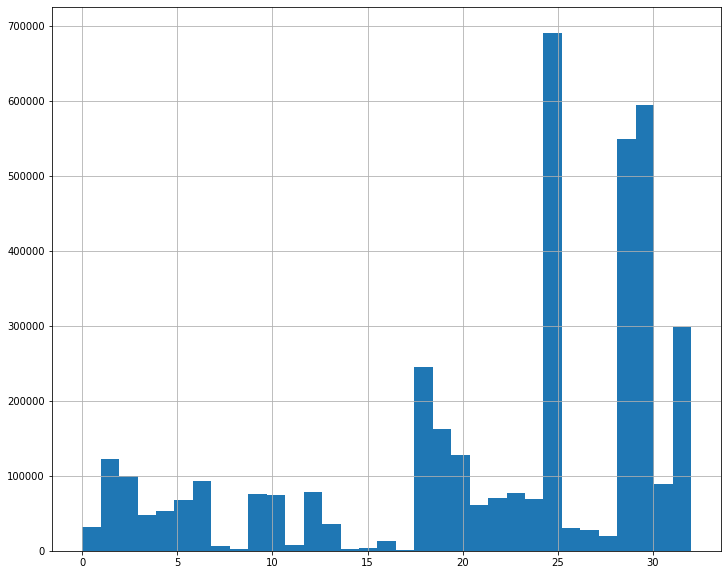

In [45]:
#!g1.1
result.classes.hist(figsize=(12,10), bins=33)

In [130]:
#!g1.1
eating = ['Алкоголь', 'Бакалея', 'Вода, соки, напитки', 
          'Готовые блюда и полуфабрикаты', 'Детское питание', 
          'Диетическое питание(полезное, спортивное)', 'Консервация', 'Молочные продукты', 
          'Овощи, грибы, фрукты, ягоды, зелень', 'Соусы и приправы',   'Сыр, масло, яйца',
          'Кондитерские изделия', 'Мясная продукция', 'Рыба и морепродукты', 'Чай, кофе, какао',
          'Хлеб']

In [131]:
#!g1.1
list(range(len(result.Y.unique())-len(eating)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [132]:
#!g1.1
rang = list(range(len(result.Y.unique())-len(eating)))
classes = {}
i = 0
for x in result.Y.unique():
    if x in eating:
        classes[x] = 0
    else:
        i+=1
        classes[x] = i
classes

{'Автотовары': 1,
 'Алкоголь': 0,
 'Бакалея': 0,
 'Бытовая техника': 2,
 'Вода, соки, напитки': 0,
 'Готовые блюда и полуфабрикаты': 0,
 'Дача, сад, огород': 3,
 'Детское питание': 0,
 'Диетическое питание(полезное, спортивное)': 0,
 'Зоотовары': 4,
 'Канцелярия': 5,
 'Консервация': 0,
 'Молочные продукты': 0,
 'Овощи, грибы, фрукты, ягоды, зелень': 0,
 'Соусы и приправы': 0,
 'Сыр, масло, яйца': 0,
 'Табак': 6,
 'Товары для взрослых': 7,
 'Кондитерские изделия': 0,
 'Косметика': 8,
 'Мясная продукция': 0,
 'Рыба и морепродукты': 0,
 'Товары для здоровья': 9,
 'Товары для спорта и отдыха': 10,
 'Электроника': 11,
 'Одежда и обувь': 12,
 'Чай, кофе, какао': 0,
 'Хобби': 13,
 'Упаковка': 14,
 'Стройматериалы(и ремонт?)': 15,
 'Товары для детей(и мам?)': 16,
 'Хлеб': 0,
 'Товары для дома': 17}

In [133]:
#!g1.1
result['classes'] = [classes[x] for x in result.Y.values]
result

,Y,X,q,w,classes
0,Автотовары,набор ремонт бескамерный шина,123197,{30453},1
1,Автотовары,кондиционер металл синтетический второй поколение,123219,{30420},1
2,Автотовары,синтетический кондиционер металл поколение,123220,{30420},1
3,Автотовары,очиститель инжектор быстрый действие,123230,{30406},1
4,Автотовары,быстрый запуск,123238,{30407},1
...,...,...,...,...,...
3732743,Товары для дома,сковорода бриллиант литой антипригарный покрыт...,29390292,{22083},17
3732744,Товары для дома,картина арт,29390319,"{21705, 2778}",17
3732745,Товары для дома,картина арт,29390367,"{21705, 2778}",17
3732746,Товары для дома,зеркало ланс,29390370,{21750},17


In [113]:
#!g1.1
result_train, result_val = train_test_split(result, test_size=0.5)
result_train

,Y,X,q,w,classes
1745933,Одежда и обувь,трусы женские танга dt цвет blue blue,1451451,{21873},12
3680420,Товары для дома,hn__x,1549998,"{2817, 21703}",17
3782096,Товары для дома,мини ролеты св желтый,5418891,"{2801, 21701}",17
786940,"Овощи, грибы, фрукты, ягоды, зелень",орехи миндаль,23744807,{4700},0
871138,Кондитерские изделия,мармелад жевательный длинная змея со вкусом кл...,2251915,"{21922, 1398}",0
...,...,...,...,...,...
851995,Кондитерские изделия,печенье сахарное московское,2054557,"{21922, 1398}",0
1300784,Мясная продукция,полуфабрикат заморож хинкали сухумские кат,8998407,{1777},0
183558,Бакалея,уксус бальзамический яблоком,2328853,{4195},0
1461147,Товары для здоровья,эрмиталь капсулы ед,8109703,{39467},9


In [ ]:
#!g1.1


In [ ]:
#!g1.1


In [ ]:
#!g1.1


In [ ]:
#!g1.1


In [115]:
#!g1.1
num_classes = 18

In [28]:
#!g1.1
%pip install sentencepiece

Defaulting to user installation because normal site-packages is not writeable


In [29]:
#!g1.1
%pip install transformers

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 127 kB 3.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
moto 1.3.14 requires idna<2.9,>=2.5, but you have idna 2.10 which is incompatible.
kaggle 1.5.8 requires urllib3<1.25,>=1.21.1, but you have urllib3 1.25.11 which is incompatible.


In [31]:
#!g1.1
%pip install tensorflow_hub

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 108 kB 3.1 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [32]:
#!g1.1
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
import keras
from tqdm import tqdm
import pickle
from keras.models import Model
import keras.backend as K
from sklearn.metrics import confusion_matrix,f1_score,classification_report
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import itertools
from keras.models import load_model
from sklearn.utils import shuffle
from transformers import *
from transformers import BertTokenizer, TFBertModel, BertConfig

Using TensorFlow backend.


In [145]:
#!g1.1
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)

In [34]:
#!g1.1
sent= 'how to train the model, lets look at how a trained model calculates its prediction.'
tokens=bert_tokenizer.tokenize(sent)
print(tokens)

['how', 'to', 'train', 'the', 'model', ',', 'lets', 'look', 'at', 'how', 'a', 'trained', 'model', 'calculate', '##s', 'its', 'prediction', '.']


In [35]:
#!g1.1
tokenized_sequence = bert_tokenizer.encode_plus(sent, add_special_tokens = True, max_length =131, pad_to_max_length = True, return_attention_mask = True)

In [36]:
#!g1.1
len(tokenized_sequence['input_ids'])

131

In [37]:
#!g1.1
bert_tokenizer.decode(tokenized_sequence['input_ids'])

'[CLS] how to train the model, lets look at how a trained model calculates its prediction. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [135]:
#!g1.1
sentences=result.X
labels=result.classes
len(sentences), len(labels)

(3732748, 3732748)

In [136]:
#!g1.1
input_ids=[]
attention_masks=[]

for sent in tqdm(sentences):
    bert_inp=bert_tokenizer.encode_plus(sent, add_special_tokens = True, max_length = 131, pad_to_max_length = True, return_attention_mask = True)
    input_ids.append(bert_inp['input_ids'])
    attention_masks.append(bert_inp['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
labels=np.array(labels)

100%|██████████| 3732748/3732748 [26:01<00:00, 2389.86it/s]


In [137]:
#!g1.1
len(input_ids),len(attention_masks),len(labels)

(3732748, 3732748, 3732748)

In [138]:
#!g1.1
print('Preparing the pickle file.....')

pickle_inp_path='data_bert/bert_inp.pkl'
pickle_mask_path='data_bert/bert_mask.pkl'
pickle_label_path='data_bert/bert_label.pkl'

pickle.dump((input_ids), open(pickle_inp_path,'wb'))
pickle.dump((attention_masks), open(pickle_mask_path,'wb'))
pickle.dump((labels), open(pickle_label_path,'wb'))


print('Pickle files saved as ', pickle_inp_path, pickle_mask_path, pickle_label_path)

Preparing the pickle file.....
Pickle files saved as  data_bert/bert_inp.pkl data_bert/bert_mask.pkl data_bert/bert_label.pkl


In [139]:
#!g1.1
print('Loading the saved pickle files..')

input_ids=pickle.load(open(pickle_inp_path, 'rb'))
attention_masks=pickle.load(open(pickle_mask_path, 'rb'))
labels=pickle.load(open(pickle_label_path, 'rb'))

print('Input shape {} Attention mask shape {} Input label shape {}'.format(input_ids.shape, attention_masks.shape, labels.shape))

Loading the saved pickle files..
Input shape (3732748, 131) Attention mask shape (3732748, 131) Input label shape (3732748,)


In [140]:
#!g1.1
train_inp, val_inp, train_label, val_label, train_mask, val_mask = train_test_split(input_ids, labels, attention_masks, test_size=0.3)

print('Train inp shape {} Val input shape {}\nTrain label shape {} Val label shape {}\nTrain attention mask shape {} Val attention mask shape {}'.format(train_inp.shape, val_inp.shape, train_label.shape, val_label.shape, train_mask.shape, val_mask.shape))

Train inp shape (2612923, 131) Val input shape (1119825, 131)
Train label shape (2612923,) Val label shape (1119825,)
Train attention mask shape (2612923, 131) Val attention mask shape (1119825, 131)


In [151]:
#!g1.1
import datetime

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
model_save_path='data_bert/bert_model.h5'

callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path, save_weights_only=True, monitor='val_loss', mode='min', save_best_only=True), keras.callbacks.TensorBoard(log_dir=log_dir)]

print('\nBert Model',bert_model.summary())

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5,epsilon=1e-08)

bert_model.compile(loss=loss,optimizer=optimizer,metrics=[metric])

Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109482240 
_________________________________________________________________
dropout_75 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  13842     
Total params: 109,496,082
Trainable params: 109,496,082
Non-trainable params: 0
_________________________________________________________________

Bert Model None


In [152]:
#!g1.1
history = bert_model.fit([train_inp,train_mask], train_label, batch_size=64, epochs=2, validation_data=([val_inp,val_mask], val_label), callbacks=callbacks, verbose=1)

2612923/2612923 [==============================] - 27046s 10ms/sample - loss: 0.3692 - accuracy: 0.8168 - val_loss: 0.3472 - val_accuracy: 0.8224


In [87]:
#!g1.1
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
%tensorboard --logdir logs/fit

Launching TensorBoard...


In [157]:
#!g1.1

model_save_path='data_bert/bert_model.h5'

target_names = []
for i in range(18):
    if i==0:
        target_names.append('Еда-напитки')
    else:
        for clas in classes:
            if classes[clas] == i:
                target_names.append(clas)
                
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')                
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5,epsilon=1e-08)
trained_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=18)
trained_model.compile(loss=loss, optimizer=optimizer, metrics=[metric])
trained_model.load_weights(model_save_path)



preds = trained_model.predict([val_inp, val_mask], batch_size=64)
pred_labels = preds.argmax(axis=1)
#f1 = f1_score(val_label, pred_labels)
#print('F1 score', f1)
print('Classification Report')
print(classification_report(val_label, pred_labels, target_names=target_names))

print('Training and saving built model.....')

Classification Report
                            precision    recall  f1-score   support

               Еда-напитки       0.98      0.99      0.98    302544
                Автотовары       0.85      0.77      0.81      9065
           Бытовая техника       0.69      0.73      0.71     14169
         Дача, сад, огород       0.90      0.82      0.86     27419
                 Зоотовары       0.96      0.91      0.93     21563
                Канцелярия       0.87      0.92      0.89     20965
                     Табак       0.99      0.97      0.98      3742
       Товары для взрослых       0.00      0.00      0.00        89
                 Косметика       0.92      0.88      0.90     46159
       Товары для здоровья       0.87      0.90      0.89     20748
Товары для спорта и отдыха       0.81      0.86      0.84     22048
               Электроника       0.86      0.82      0.84     19152
            Одежда и обувь       0.66      0.72      0.69    202369
                     Хобб

Traceback (most recent call last):
  File "/kernel/lib/python3.7/site-packages/ml_kernel/state/state_protocol.py", line 287, in _load_component
    value = unpickler.load()
KeyError: 1

The above exception was the direct cause of the following exception:

ml_kernel.state.state_protocol.KernelStateProtocol.DeserializationException
Traceback (most recent call last):
  File "/kernel/lib/python3.7/site-packages/ml_kernel/state/state_protocol.py", line 287, in _load_component
    value = unpickler.load()
KeyError: 1

The above exception was the direct cause of the following exception:

ml_kernel.state.state_protocol.KernelStateProtocol.DeserializationException
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/

In [ ]:
#!g1.4


In [ ]:
#!g1.4


In [ ]:
#!g1.4


In [ ]:
#!g1.4


In [ ]:
#!g1.1


In [ ]:
#!g1.1


In [ ]:
#!g1.1
